In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

# 전처리

In [2]:
df = pd.read_csv('../../preprocessed/data.csv')
df.dropna(inplace=True)

In [3]:
# x 데이터 : 전용면적(㎡), 층, 건축년도, 위도, 경도, 입지와 최소 거리
# y 데이터 : 거래금액(만원)

In [96]:
x = df.drop(columns=['단지명','주소', '거래금액(만원)','계약년월','전용면적(㎡)','층','위도','경도','건축년도'])
y = df[['거래금액(만원)']]

In [97]:
y = y.apply(lambda x: x.str.replace(',', '').astype(float))['거래금액(만원)']
y

0        17800.0
1        33000.0
2        11500.0
3        34700.0
4        20000.0
          ...   
11816    10000.0
11817    20000.0
11818    11000.0
11819    16500.0
11820    10000.0
Name: 거래금액(만원), Length: 11531, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 랜덤포레스트

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

# 선형회귀모델

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# 의사결정트리

In [102]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

# KNN

In [103]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

# XGBOOST

In [104]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# LightGBM

In [105]:
from lightgbm import LGBMRegressor
gbm = LGBMRegressor()
gbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4739
[LightGBM] [Info] Number of data points in the train set: 9224, number of used features: 21
[LightGBM] [Info] Start training from score 29528.039029


LGBMRegressor()

# Ridge, Lasso

In [106]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [107]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

# 그라디언트 부스팅

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

# 모델 평가

In [109]:
from sklearn.metrics import *

# rmse 함수
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# adjusted r2 함수
def calculate_adjusted_r2(y_true, y_pred, num_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_features - 1)
    return adjusted_r2

def evaluate_model(model, name, model_df):
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    adjusted_r2 = calculate_adjusted_r2(y_test, y_pred, x_test.shape[1])

    print('모델 이름 : ', name)
    print('----------------------')
    print('MSE: {0:.3f}'.format(mse))
    print('MAE: {0:.3f}'.format(mae))
    print('RMSE: {0:.3f}'.format(rmse))
    print('R-Score: {0:.3f}'.format(r2))
    print('Adjsuted R-Score: {0:.3f}'.format(adjusted_r2))
    print('----------------------')

    model_df.loc[len(model_df)] = [name, mse, mae, rmse, r2, adjusted_r2] 
    

In [110]:
model_df = pd.DataFrame({
    'model': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-Score': [],
    'Adjusted R-Score': []
})

In [111]:
evaluate_model(rf, '랜덤포레스트', model_df)

모델 이름 :  랜덤포레스트
----------------------
MSE: 22243452.065
MAE: 2841.668
RMSE: 4716.296
R-Score: 0.908
Adjsuted R-Score: 0.907
----------------------


In [112]:
evaluate_model(lr, '선형회귀', model_df)

모델 이름 :  선형회귀
----------------------
MSE: 110679662.367
MAE: 7819.921
RMSE: 10520.440
R-Score: 0.544
Adjsuted R-Score: 0.540
----------------------


In [113]:
evaluate_model(dt, '의사결정트리', model_df)

모델 이름 :  의사결정트리
----------------------
MSE: 22456336.406
MAE: 2846.459
RMSE: 4738.812
R-Score: 0.907
Adjsuted R-Score: 0.907
----------------------


In [114]:
evaluate_model(knn, 'KNN', model_df)

모델 이름 :  KNN
----------------------
MSE: 23949071.771
MAE: 3061.579
RMSE: 4893.779
R-Score: 0.901
Adjsuted R-Score: 0.900
----------------------


In [115]:
evaluate_model(xgb, 'XGBoost', model_df)

모델 이름 :  XGBoost
----------------------
MSE: 22241121.653
MAE: 2850.923
RMSE: 4716.049
R-Score: 0.908
Adjsuted R-Score: 0.907
----------------------


In [116]:
evaluate_model(gbm, 'LightGBM', model_df)

모델 이름 :  LightGBM
----------------------
MSE: 22342278.197
MAE: 2859.666
RMSE: 4726.762
R-Score: 0.908
Adjsuted R-Score: 0.907
----------------------


In [117]:
evaluate_model(ridge, 'Ridge', model_df)

모델 이름 :  Ridge
----------------------
MSE: 110741685.219
MAE: 7813.348
RMSE: 10523.388
R-Score: 0.543
Adjsuted R-Score: 0.539
----------------------


In [118]:
evaluate_model(lasso, 'Lasso', model_df)

모델 이름 :  Lasso
----------------------
MSE: 110657936.763
MAE: 7819.578
RMSE: 10519.408
R-Score: 0.544
Adjsuted R-Score: 0.540
----------------------


In [119]:
evaluate_model(gb, '그라디언트 부스팅', model_df)

모델 이름 :  그라디언트 부스팅
----------------------
MSE: 31419455.393
MAE: 3677.129
RMSE: 5605.306
R-Score: 0.870
Adjsuted R-Score: 0.869
----------------------


In [120]:
model_df

,model,MSE,MAE,RMSE,R-Score,Adjusted R-Score
0,랜덤포레스트,2.224345e+07,2841.668057,4716.296435,0.908307,0.907464
1,선형회귀,1.106797e+08,7819.920772,10520.440217,0.543751,0.539558
2,의사결정트리,2.245634e+07,2846.459080,4738.811708,0.907429,0.906579
3,KNN,2.394907e+07,3061.578847,4893.778885,0.901276,0.900369
4,XGBoost,2.224112e+07,2850.923377,4716.049369,0.908317,0.907474
5,LightGBM,2.234228e+07,2859.666214,4726.761915,0.907900,0.907053
6,Ridge,1.107417e+08,7813.348434,10523.387535,0.543496,0.539300
7,Lasso,1.106579e+08,7819.577741,10519.407624,0.543841,0.539649
8,그라디언트 부스팅,3.141946e+07,3677.128912,5605.306003,0.870481,0.869291


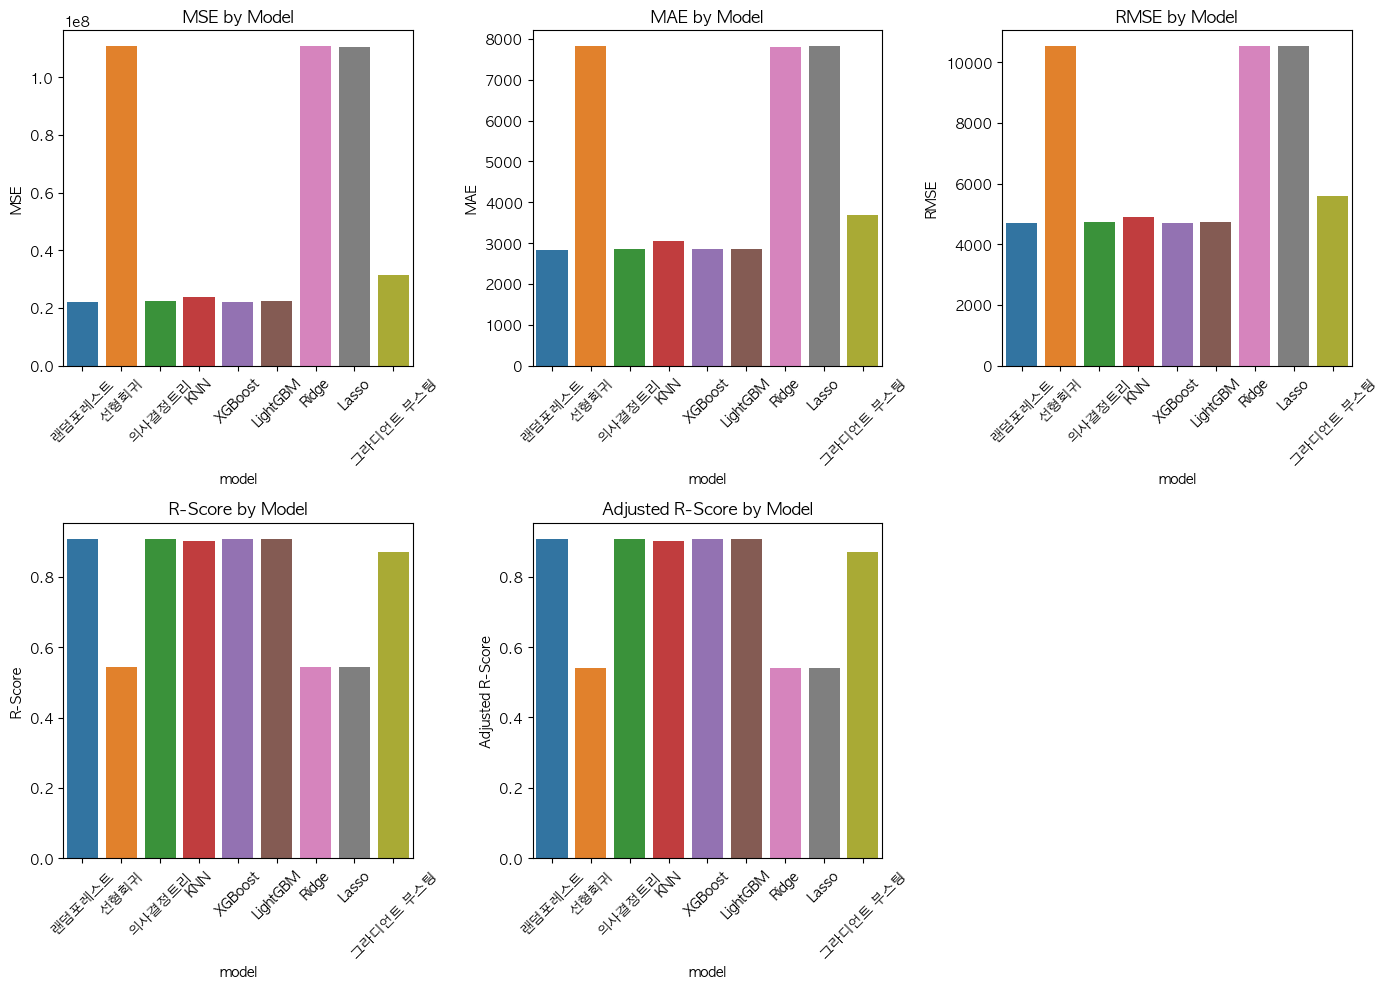

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

metrics = ['MSE', 'MAE', 'RMSE', 'R-Score', 'Adjusted R-Score']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='model', y=metric, data=model_df)
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [122]:
# 특성 중요도 추출
feature_importances = rf.feature_importances_
x_list = x.columns.to_list()

# 특성 중요도 출력
for idx, importance in enumerate(feature_importances):
    print(f'{idx} {x_list[idx]}: {importance:.4f}')

0 약국: 0.0069
1 의원: 0.0105
2 일반병원: 0.2196
3 종합병원: 0.2104
4 요양병원: 0.0108
5 보건병원: 0.0312
6 한방병원: 0.0233
7 치과: 0.0042
8 대형상권: 0.0678
9 공원: 0.0242
10 도서관: 0.0472
11 카페: 0.0098
12 편의점: 0.0053
13 유치원: 0.1147
14 어린이집: 0.0099
15 초등학교: 0.0137
16 중학교: 0.0278
17 고등학교: 0.0126
18 학원: 0.0216
19 지하철: 0.0979
20 버스정류장: 0.0304


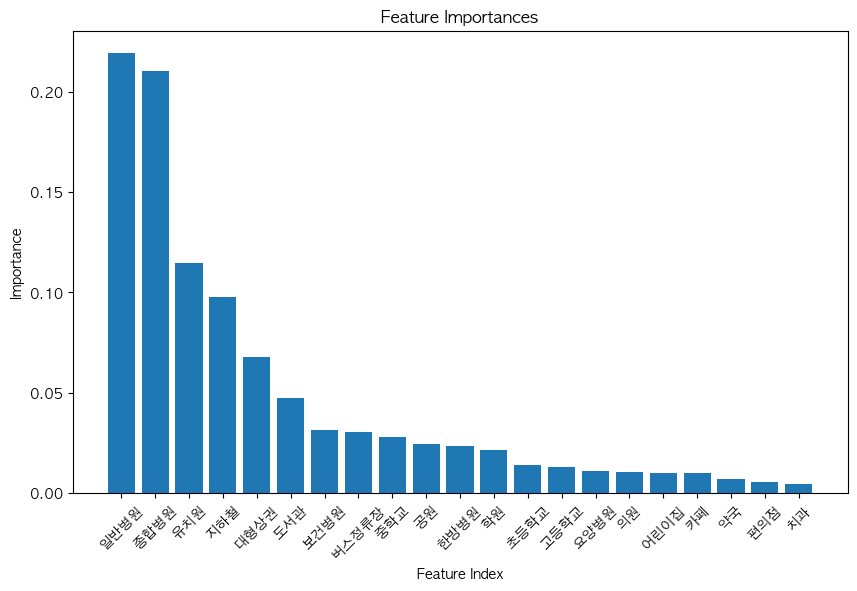

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(feature_importances)[::-1]
new_list = [x_list[i] for i in indices]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), new_list, rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

## 결과

XGBoost, LightGBM, RandomForest와 같은 앙상블 모델이 좋은 결과를 나타냄

의사결정트리 역시 좋은 결과를 나타냄


22년 8월부터 24년 8월까지 2년간 약 11531개의 아파트 거래금액 평균 = 29964(만원)


가장 좋은 성능인 랜덤포레스트 모델

MAE: 2841

RMSE: 4800